In [1]:
# Write half-hourly GPP, Reco, NEP and ET OzFlux data to csv

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import netCDF4
import numpy as np
import re
import datetime
from matplotlib.backends.backend_pdf import PdfPages

In [3]:
##Sets up arrays used for loops
#Sites to loop through each location
#Sites = ['Tumbarumba','Warra','WombatStateForest','CumberlandPlain']
Sites = ['Tumbarumba']
Vars = ['GPP_SOLO', 'NEP_SOLO', 'ET', 'ER_SOLO']
csvVars = ['GPP', 'NEP', 'evap', 'Reco']

In [4]:
##sets up default info
#puts everything into an overarching dataframe
def Setup_Default(site, Everything, Vars):
##Sets up file info in nc
    print(site)
#    url='http://dap.ozflux.org.au/thredds/fileServer/ozflux/sites/' + site + '/L6/default/' + site + '_L6.nc'
    url='http://dap.ozflux.org.au/thredds/dodsC/ozflux/sites/' + site + '/L6/default/' + site + '_L6.nc'
    nc = netCDF4.Dataset(url,'r')
    nc.set_auto_mask(False)
    times = nc.variables['time']
    jd = netCDF4.num2date(times[:],times.units,)
##Loop over variable type 
    for x in range (0,len(Vars)):
##Try catches any that are found, except prevents stops
##saves into dataframe, remmoves outliers, resamples into monthly and annual dataframes
        Name = Vars[x]     
        QCFlagName = Name + '_QCFlag'
        print(Name,' ',QCFlagName)
        try:
            h = nc.variables[Name]
            Everything[Name] = pd.Series(h[:,0,0], index = jd)
            h = nc.variables[QCFlagName]
            Everything[QCFlagName] = pd.Series(h[:,0,0], index = jd)
            Everything.loc[Everything[QCFlagName] != 0, Name] = -9999.0  # replace data without QCFlag=0 with -9999
        except KeyError:
            Filler = 0

In [5]:
##exports info to csv
#one file for every processing type
def Export_to_csv(site, Vars, csvVars):
    Compiled = pd.DataFrame()
    Compiled_Plot = pd.DataFrame()
    fig=plt.figure(figsize=(10, 6.7))
    #path = '/home/tru034/notebooks/outputs/'
    path = './'
    for y in range (0,len(csvVars)):
##Checks if it has data for each variable
        try:
            ##Sorts info for each file to Compiled dataframe
            Compiled[csvVars[y]] = Everything[Vars[y]]
        except KeyError:
            FillerNUM = 1      
#if no data is found for the site, doesn't create an empty csv
    if Compiled.empty:
        fillerNum = 1
##prints compiled data to csv
    else:
        Compiled['date'] = Compiled.index
        Compiled['Year'] = Compiled.date.dt.year
        Compiled['Month'] = Compiled.date.dt.month
        Compiled['Day'] = Compiled.date.dt.day
        Compiled['Hour'] = Compiled.date.dt.hour
        if (site != 'Tumbarumba'):
            Compiled['Minute'] = Compiled.date.dt.minute
        Compiled_Plot = Compiled.copy()    
        Compiled_Plot.replace(to_replace=-9999.0, value=np.NaN, inplace=True)
        for y in range (0,len(csvVars)):
            if not Compiled_Plot[csvVars[y]].isnull().all():
                print('plot ',csvVars[y])
                ax = plt.subplot2grid((4,1),(y, 0))    
                ax.plot(Compiled_Plot.date.dt.date,Compiled_Plot[csvVars[y]])
                ax.set_title(site+' '+csvVars[y]+' - zero flag',size=12.0) 
        plt.tight_layout()
        plt.show() 
        plotflnm = path + site + '_zeroflag.pdf'
        fig.savefig(plotflnm) #,dpi=fig.dpi, bbox_inches='tight')
        plt.close(fig)    
        Compiled = Compiled.drop('date', axis=1)
        if (site != 'Tumbarumba'):
            Compiled.set_index(['Year', 'Month', 'Day', 'Hour', 'Minute'], inplace = True)
        else:
            Compiled.set_index(['Year', 'Month', 'Day', 'Hour'], inplace = True)
        if (site == 'Tumbarumba'):
            tres = 'Hourly'
        else:
            tres = 'HalfHourly'
        flnm = path + site + '_' + tres + '.csv'
        print('writing to file ',flnm)
        Compiled.to_csv(flnm, sep=',', index = True)

Tumbarumba
GPP_SOLO   GPP_SOLO_QCFlag
NEP_SOLO   NEP_SOLO_QCFlag
ET   ET_QCFlag
ER_SOLO   ER_SOLO_QCFlag
                     GPP_SOLO  GPP_SOLO_QCFlag  NEP_SOLO  NEP_SOLO_QCFlag  \
2002-01-01 01:00:00   -9999.0               30   -9999.0               30   
2002-01-01 02:00:00   -9999.0               30   -9999.0               30   
2002-01-01 03:00:00   -9999.0               30   -9999.0               30   
2002-01-01 04:00:00   -9999.0               30   -9999.0               30   
2002-01-01 05:00:00   -9999.0               30   -9999.0               30   

                         ET  ET_QCFlag  ER_SOLO  ER_SOLO_QCFlag  
2002-01-01 01:00:00 -9999.0         30  -9999.0              30  
2002-01-01 02:00:00 -9999.0         30  -9999.0              30  
2002-01-01 03:00:00 -9999.0         30  -9999.0              30  
2002-01-01 04:00:00 -9999.0         30  -9999.0              30  
2002-01-01 05:00:00 -9999.0         30  -9999.0              30  
plot  GPP
plot  NEP
plot  evap
plot 

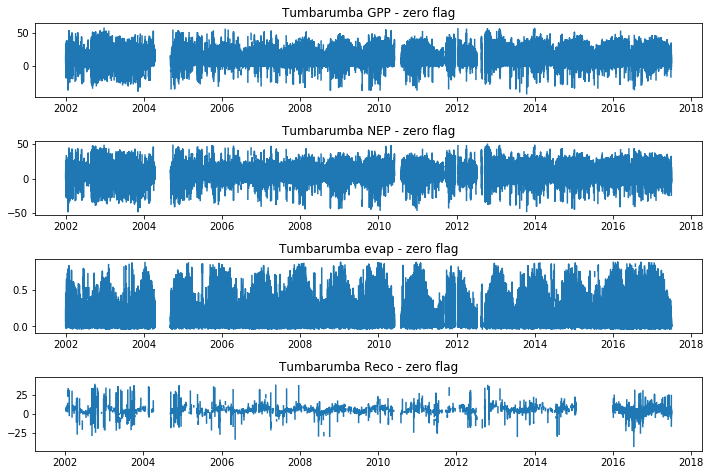

writing to file  ./Tumbarumba_Hourly.csv


In [6]:
for A in range (0, len(Sites)):
##Sets up dataframes
    Everything = pd.DataFrame() 
    Setup_Default(Sites[A], Everything, Vars)
    print(Everything[:5])
    Export_to_csv(Sites[A], Vars, csvVars)

In [7]:
site = 'Warra'
url='http://dap.ozflux.org.au/thredds/dodsC/ozflux/sites/' + site + '/L6/default/' + site + '_L6.nc'
nc = netCDF4.Dataset(url,'r')
nc.set_auto_mask(False)
nc

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format DAP2):
    _NCProperties: version=1|netcdflibversion=4.4.1|hdf5libversion=1.8.17
    BulkDensity: 950
    EPDversion: 2.7.12 |Anaconda custom (64-bit)| (default, Jul  2 2016, 17:42:40) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
    FgDepth: 0.08
    Functions: ,do_linear, TaFromTv, CalculateMetVars, CoordRotation2D, CalculateFluxes, FhvtoFh, CorrectFgForStorage,RangeCheck,do_qcchecks, GapFillFromClimatology, GapFillFromalternate, GapFillUsingSOLO, ERUsingSOLO, ERUsingFFNET
    OrganicContent: 0.045
    QC_version: PyFluxPro V0.1.2
    SwsDefault: 0.15
    SwsSeries: ['Sws']
    acknowledgement: This work used eddy covariance data collected by the TERN-OzFlux facility. OzFlux
would like to acknowledge the financial support of the Australian Federal Government via
the National Collaborative Research Infrastructure Scheme and the Education Investment
Fund.
    canopy_height: 55m
    comment: CF metadata, O

In [8]:
print(nc.variables['GPP_SOLO'].units)

umol/m2/s


In [9]:
!pwd

/OSM/CBR/OA_GLOBALCABLE/work/BIOS3_simulations/python_scripts


In [10]:
site = 'Tumbarumba'
url='http://dap.ozflux.org.au/thredds/dodsC/ozflux/sites/' + site + '/L6/default/' + site + '_L6.nc'
n = netCDF4.Dataset(url,'r')
n.set_auto_mask(False)
print(n.variables['ET'].units)
print(n.variables['Fh'].units)
print(n.variables['GPP_SOLO'].units)

mm
W/m2
umol/m2/s


In [11]:
def read_ozflux(site, tstep):
    url='http://dap.ozflux.org.au/thredds/dodsC/ozflux/sites/' + site + '/L6/default/' + site + '_L6.nc'
    f = netCDF4.Dataset(url,'r')
    f.set_auto_mask(False)
    time = netCDF4.num2date(f.variables['time'][:],
                        f.variables['time'].units)
    df = pd.DataFrame(f.variables['GPP_SOLO'][:,0,0], columns=['GPP'])
    df['dates'] = time
    df['NEP'] = f.variables['NEP_SOLO'][:,0,0]
    df['ET'] = f.variables['ET'][:,0,0]*(24*3600/tstep) # mm -> mm/d
    df = df.set_index('dates')
    return df

In [12]:
df_obs=read_ozflux('Tumbarumba',3600)

In [13]:
df_obs[:100]

,GPP,NEP,ET
dates,,,
2002-01-01 01:00:00,0.0000,-5.9908,0.209066
2002-01-01 02:00:00,0.0000,-5.8645,0.433532
2002-01-01 03:00:00,0.0000,-5.6978,-0.050676
2002-01-01 04:00:00,0.0000,-5.3214,-0.114110
2002-01-01 05:00:00,0.0000,-4.9575,0.270870
2002-01-01 06:00:00,-2.1965,-7.1300,0.576087
2002-01-01 07:00:00,9.3851,4.2735,1.845969
2002-01-01 08:00:00,17.4889,12.1141,3.678272
2002-01-01 09:00:00,18.2382,12.7038,3.970259


In [14]:
df_obs['GPP'].mean()*1e-6*12*3600*24*365
#df_obs['GPP'].max()

2594.2200365440594

In [15]:
!pwd

/OSM/CBR/OA_GLOBALCABLE/work/BIOS3_simulations/python_scripts


In [16]:
Everything[1000:1100]

,GPP_SOLO,GPP_SOLO_QCFlag,NEP_SOLO,NEP_SOLO_QCFlag,ET,ET_QCFlag,ER_SOLO,ER_SOLO_QCFlag
2002-02-11 17:00:00,10.139136,0,1.873636,0,0.156282,0,-9999.000000,30
2002-02-11 18:00:00,9.984382,0,1.859582,0,0.128804,0,-9999.000000,30
2002-02-11 19:00:00,4.098260,0,-3.690340,0,0.032521,0,-9999.000000,30
2002-02-11 20:00:00,0.000000,0,-11.316541,0,0.007435,0,11.316541,0
2002-02-11 21:00:00,-9999.000000,30,-9999.000000,30,0.006826,0,-9999.000000,30
2002-02-11 22:00:00,-9999.000000,30,-9999.000000,30,0.008822,0,-9999.000000,30
2002-02-11 23:00:00,-9999.000000,30,-9999.000000,30,-9999.000000,30,-9999.000000,30
2002-02-12 00:00:00,-9999.000000,30,-9999.000000,30,-9999.000000,30,-9999.000000,30
2002-02-12 01:00:00,-9999.000000,30,-9999.000000,30,-9999.000000,30,-9999.000000,30
2002-02-12 02:00:00,-9999.000000,30,-9999.000000,30,-9999.000000,30,-9999.000000,30


In [17]:
tmp=pd.read_csv('Tumbarumba_Hourly.csv')

In [18]:
tmp[:5]

,Year,Month,Day,Hour,GPP,NEP,evap,Reco
0,2002,1,1,1,-9999.0,-9999.0,-9999.0,-9999.0
1,2002,1,1,2,-9999.0,-9999.0,-9999.0,-9999.0
2,2002,1,1,3,-9999.0,-9999.0,-9999.0,-9999.0
3,2002,1,1,4,-9999.0,-9999.0,-9999.0,-9999.0
4,2002,1,1,5,-9999.0,-9999.0,-9999.0,-9999.0


In [19]:
meanGPP=tmp[(tmp['GPP']==-9999)].mean()

In [20]:
13.2*1e-6*12*3600*24*365

4995.3024

In [21]:
tmp.GPP[tmp.GPP == -9999.0] = 0 

/OSM/CBR/OA_GLOBALCABLE/work/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [22]:
tmp.mean()

Year     2009.256591
Month       6.426365
Day        15.726257
Hour       11.500085
GPP         4.468850
NEP     -6610.863128
evap    -5209.402776
Reco    -9667.679585
dtype: float64

In [23]:
tmp.GPP.mean()*1e-6*12*3600*24*365

1691.1560196768712